# **PERSIAPAN DATA**

In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer

# Load Dataset
file_path = "/content/drive/MyDrive/Capstone project /ObesityDataSet.csv"  # Ganti sesuai lokasi file
df = pd.read_csv(file_path)

# Define the variable
folder_name = "/content/drive/MyDrive/Capstone project /Capstone-DS03.ipynb"
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


# **EDA (Exploratory Data Analysis)**

In [2]:
# mencoba menampilkan info dataset
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

In [4]:
# Melihat Deskripsi statistik
df.describe()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [5]:
# Cek missing values, duplikasi, dan unique values
print('Missing Values:')
display(df.isnull().sum())

Missing Values:


,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [6]:
print('Data duplikat:',df.duplicated().sum())

Data duplikat: 18


In [7]:
print('Jumlah data uniq per kolom:')
display(df.nunique())

Jumlah data uniq per kolom:


,0
Age,1394
Gender,3
Height,1562
Weight,1518
CALC,5
FAVC,3
FCVC,808
NCP,637
SCC,3
SMOKE,3


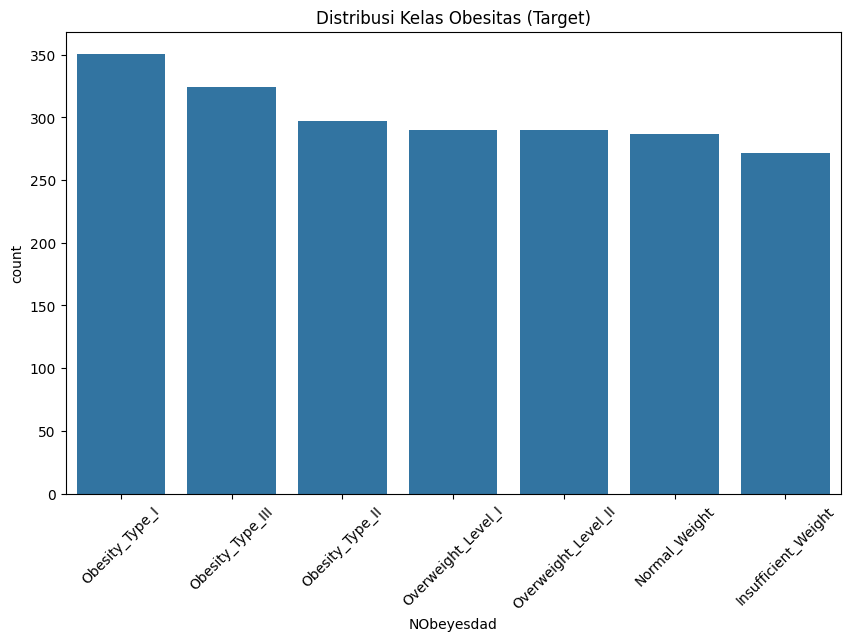

In [8]:
# Distribusi kelas target
plt.figure(figsize=(10,6))
sns.countplot(x='NObeyesdad', data=df, order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribusi Kelas Obesitas (Target)')
plt.show()

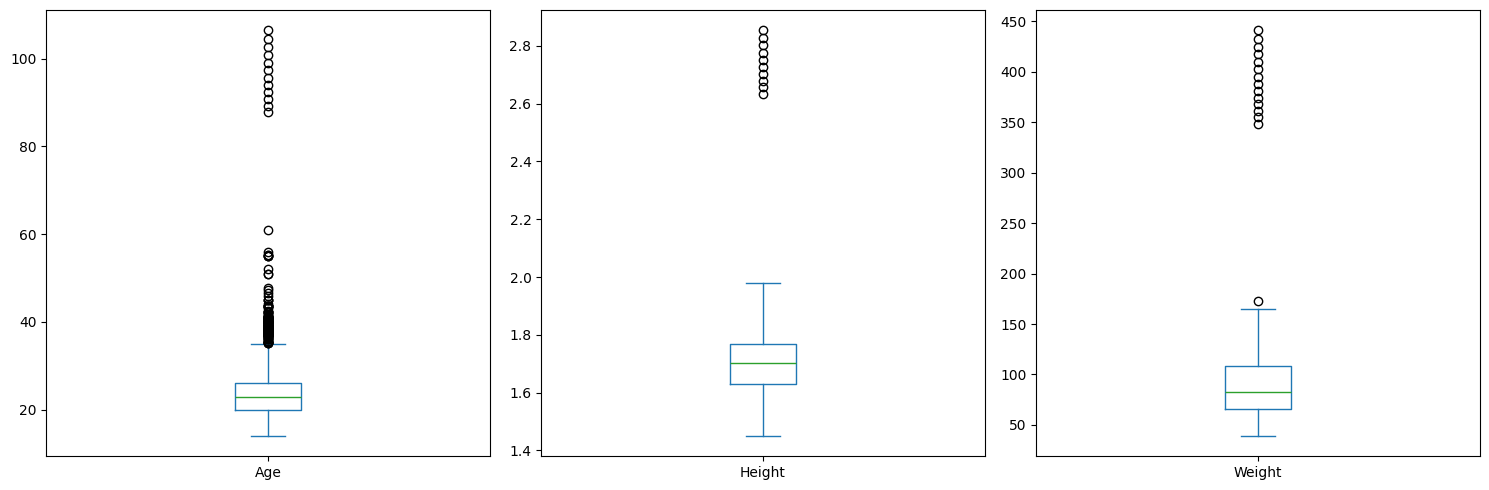

In [9]:
# Boxplot untuk deteksi outlier kolom numerik
num_cols = ['Age', 'Height', 'Weight']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df[num_cols].plot(kind='box', subplots=True, layout=(1,3), figsize=(15,5))
plt.tight_layout()
plt.show()

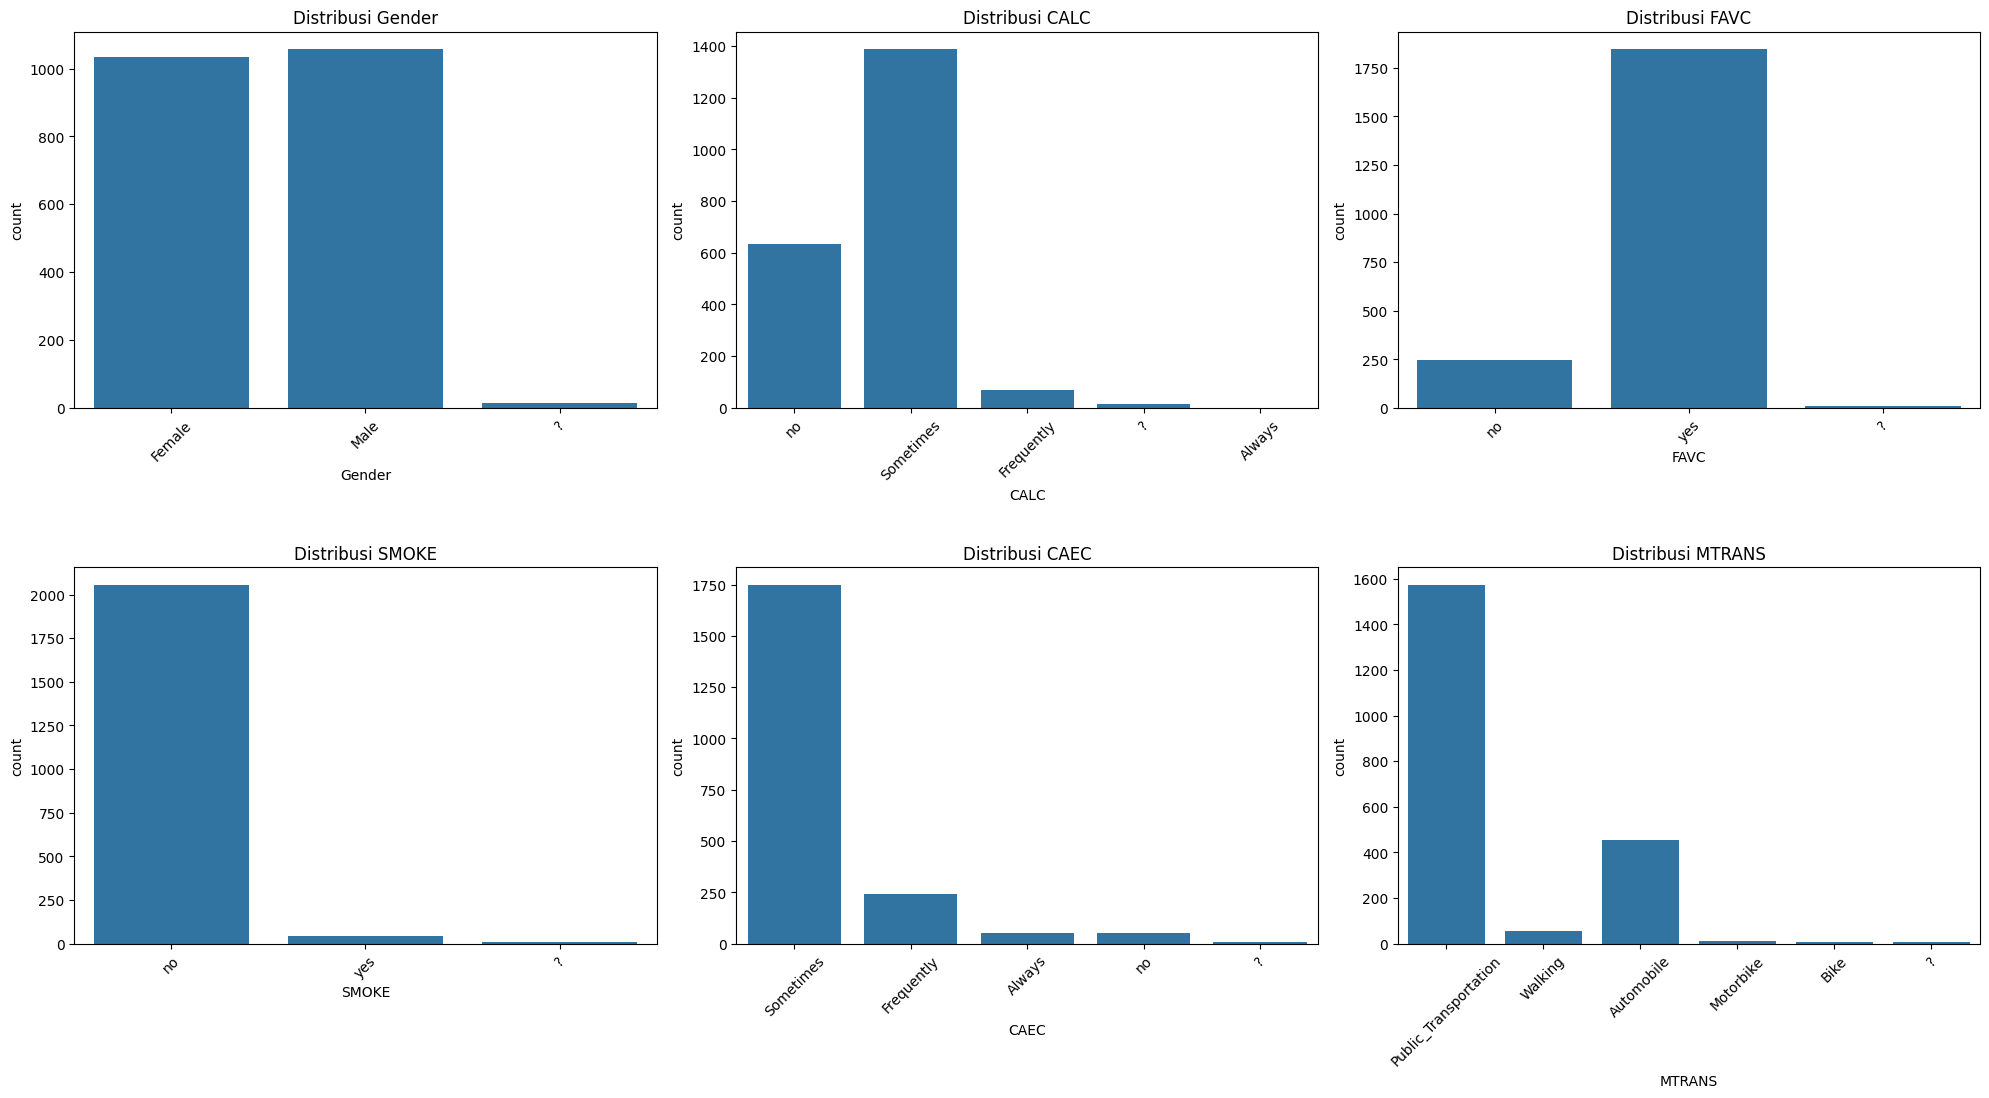

In [10]:
#visualisasi nilai/data kategorikal

cat_cols = ['Gender', 'CALC', 'FAVC', 'SMOKE', 'CAEC', 'MTRANS']

plt.figure(figsize=(20, 15))
for i, col in enumerate(cat_cols):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.title(f'Distribusi {col}')

plt.tight_layout()
plt.show()

###  Kesimpulan EDA
- Dataset terdiri dari 17 kolom dan 2111 baris.
- Banyak kolom bertipe `object`, termasuk data numerik.
- Ada missing values dan data duplikat yang perlu ditangani.
- Distribusi kelas target tampak tidak seimbang.
- Beberapa kolom numerik menunjukkan kemungkinan adanya outlier.
- Visualisasi kolom kategorikal menunjukkan:

   - Beberapa kolom seperti `Gender, CALC, SMOKE, dan MTRANS` memiliki nilai tidak valid seperti '?', yang harus dibersihkan atau dikategorikan ulang.

   - Distribusi kategori pada beberapa kolom tidak merata, yang dapat berpengaruh terhadap model jika tidak diatasi dengan baik (misalnya dengan encoding atau balancing).

# **PELATIHAN dan EVALUASI (TANPA PRE-PROCESSING dan TUNING)**

In [11]:
# baca dataset untuk pelatihan yang masih kotor
df_raw = pd.read_csv('/content/drive/MyDrive/Capstone project /ObesityDataSet.csv')

# Pisahkan fitur dan target
X_raw = df_raw.drop('NObeyesdad', axis=1)
y_raw = df_raw['NObeyesdad']

# Label encode target
from sklearn.preprocessing import LabelEncoder
target_encoder = LabelEncoder()
y_raw_encoded = target_encoder.fit_transform(y_raw)

# Label encode semua fitur kategorikal (string jadi angka)
X_encoded = X_raw.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Bagi data
from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_encoded, y_raw_encoded, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [13]:
# Inisialisasi model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

models_raw = {
    "Logistic Regression": LogisticRegression(max_iter=10000, solver='saga'),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Evaluasi
results_raw = {}

for model_name, model in models_raw.items():
    print(f"Model Algoritma: {model_name}")
    model.fit(X_train_raw, y_train_raw)
    y_pred_raw = model.predict(X_test_raw)

    acc = accuracy_score(y_test_raw, y_pred_raw)
    prec = precision_score(y_test_raw, y_pred_raw, average='weighted', zero_division=0)
    rec = recall_score(y_test_raw, y_pred_raw, average='weighted')
    f1 = f1_score(y_test_raw, y_pred_raw, average='weighted')

    results_raw[model_name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "y_pred": y_pred_raw
    }

    print(classification_report(y_test_raw, y_pred_raw, target_names=target_encoder.classes_))
    print("="*60)

Model Algoritma: Logistic Regression
                     precision    recall  f1-score   support

Insufficient_Weight       0.50      0.50      0.50        56
      Normal_Weight       0.35      0.23      0.27        62
     Obesity_Type_I       0.29      0.22      0.25        78
    Obesity_Type_II       0.76      0.90      0.83        58
   Obesity_Type_III       0.75      0.95      0.84        63
 Overweight_Level_I       0.31      0.27      0.29        56
Overweight_Level_II       0.32      0.46      0.38        50

           accuracy                           0.49       423
          macro avg       0.47      0.50      0.48       423
       weighted avg       0.47      0.49      0.47       423

Model Algoritma: Random Forest
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.95      0.96        56
      Normal_Weight       0.84      0.87      0.86        62
     Obesity_Type_I       0.96      0.92      0.94        78
    Obesity_T

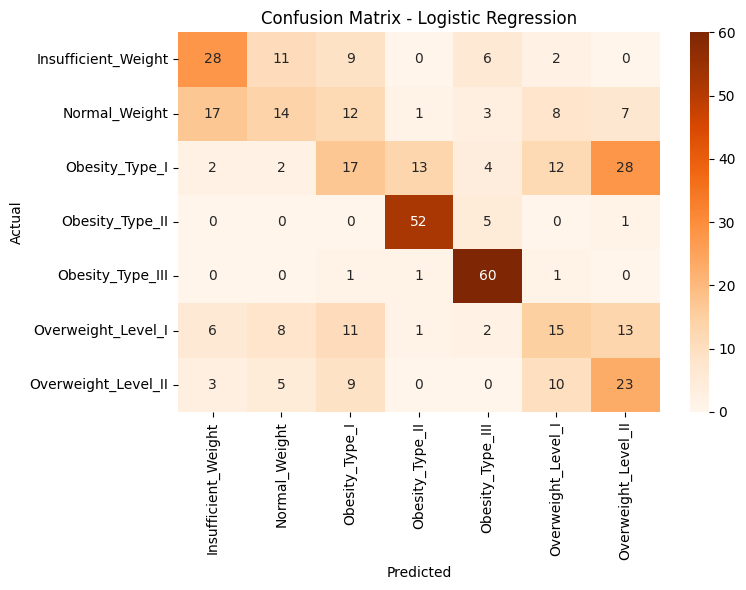

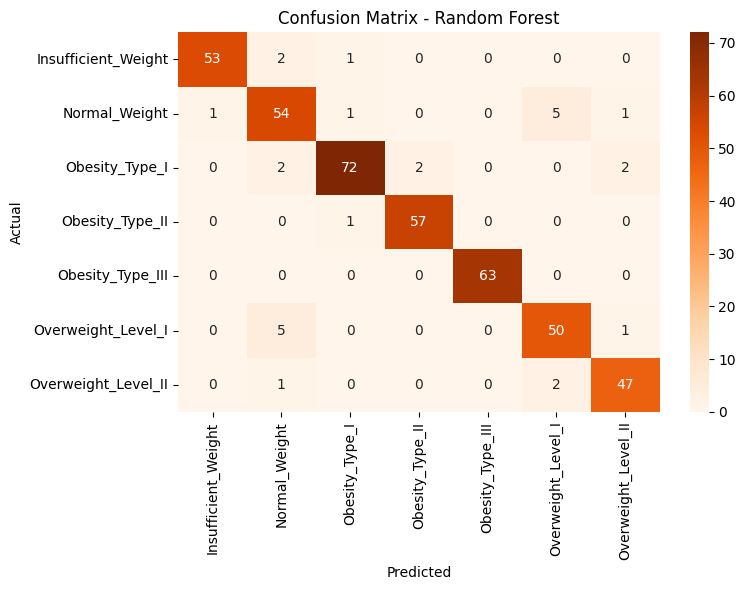

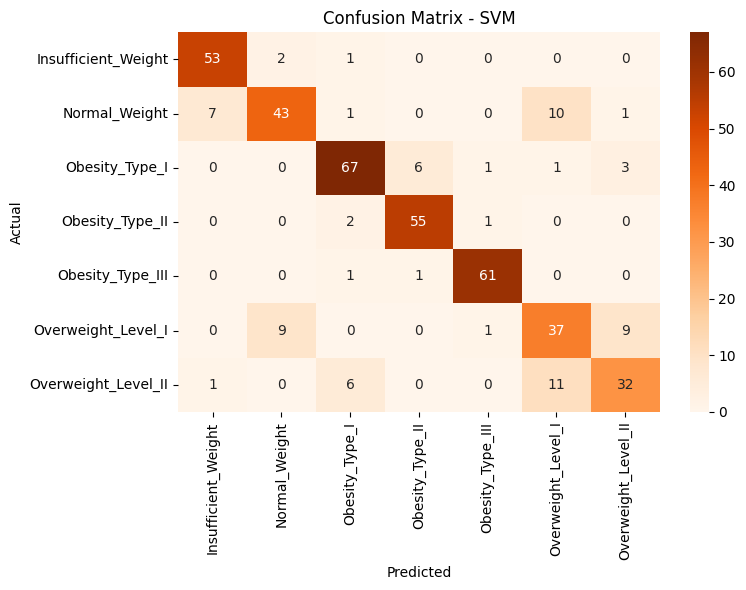

In [14]:
# Confusion matrix & hasil evaluasi
for model_name in models_raw:
    cm = confusion_matrix(y_test_raw, results_raw[model_name]["y_pred"])
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
                xticklabels=target_encoder.classes_,
                yticklabels=target_encoder.classes_)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

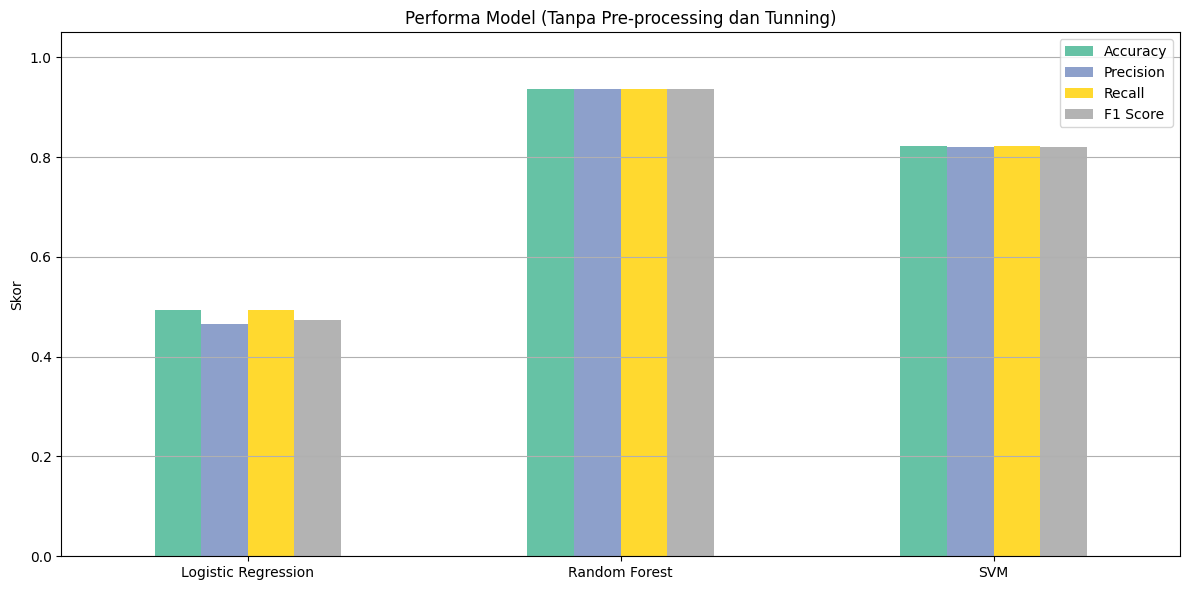

Tabel Evaluasi:


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.49409,0.466311,0.49409,0.473106
Random Forest,0.93617,0.937094,0.93617,0.936462
SVM,0.822695,0.820801,0.822695,0.820581


In [15]:
# Tabel hasil evaluasi
results_df_raw = pd.DataFrame(results_raw).T[['Accuracy', 'Precision', 'Recall', 'F1 Score']]

# Grafik perbandingan
results_df_raw.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Performa Model (Tanpa Pre-processing dan Tunning)")
plt.ylabel("Skor")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Tampilkan tabel evaluasi
print("Tabel Evaluasi:")
display(results_df_raw)

Kesimpulan :
- pelatihan model klasifikasi dengan logistic regression dan knn tanpa adanya pre-processing, hasil dari model sangatlah buruk atau kurang bagus.
- dalam kasus random forest, algoritma ini ternyata sejak awal tanpa dilakukanya pre-processing dan tunning untuk skornya mendaptkan hasil yang bagus di angka rata-rata 94%
- maka dari itu dari sini dilihat bahwa pre-processing mungkin bisa membantu untuk memperbaiki kinerja model yang ada

# **PRE-PROCESSING**

In [16]:
# Ganti tanda '?' menjadi NaN agar bisa dideteksi sebagai missing value
df.replace('?', np.nan, inplace=True)

# Ubah kolom-kolom yang seharusnya numerik ke tipe float
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Cek tipe kolom dan tentukan kolom kategorikal dan numerik
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Untuk data kategorikal, isi missing value dengan modus (nilai terbanyak)
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        imputer = SimpleImputer(strategy='most_frequent')
        df[col] = imputer.fit_transform(df[[col]]).ravel()

# Untuk data numerik, isi missing value dengan median
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        imputer = SimpleImputer(strategy='median')
        df[col] = imputer.fit_transform(df[[col]])

# Hapus data duplikat
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]

df.head(51)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.62,64.000000,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.00000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.52,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.00000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.80,77.000000,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.00000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.80,87.000000,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.00000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.78,89.800000,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.00000,Sometimes,Public_Transportation,Overweight_Level_II
5,29.000000,Male,1.62,53.000000,Sometimes,yes,2.0,3.0,no,no,2.0,no,0.0,0.00000,Sometimes,Automobile,Normal_Weight
6,23.000000,Female,1.50,55.000000,Sometimes,yes,3.0,3.0,no,no,2.0,yes,1.0,0.00000,Sometimes,Motorbike,Normal_Weight
7,22.000000,Male,1.64,53.000000,Sometimes,no,2.0,3.0,no,no,2.0,no,3.0,0.00000,Sometimes,Public_Transportation,Normal_Weight
8,24.000000,Male,1.78,348.497776,Frequently,yes,3.0,3.0,no,no,2.0,yes,1.0,1.00000,Sometimes,Public_Transportation,Normal_Weight
9,22.000000,Male,1.72,68.000000,no,yes,2.0,3.0,no,no,2.0,yes,1.0,1.00000,Sometimes,Public_Transportation,Normal_Weight


In [17]:
print(f"Jumlah data sebelum hapus duplikat: {before}")
print(f"Jumlah data setelah hapus duplikat: {after}")
print(f"Jumlah data duplikat yang dihapus: {before - after}")

Jumlah data sebelum hapus duplikat: 2111
Jumlah data setelah hapus duplikat: 2091
Jumlah data duplikat yang dihapus: 20


- Menghindari Kehilangan Informasi
- Menjaga Keseimbangan Distribusi Data

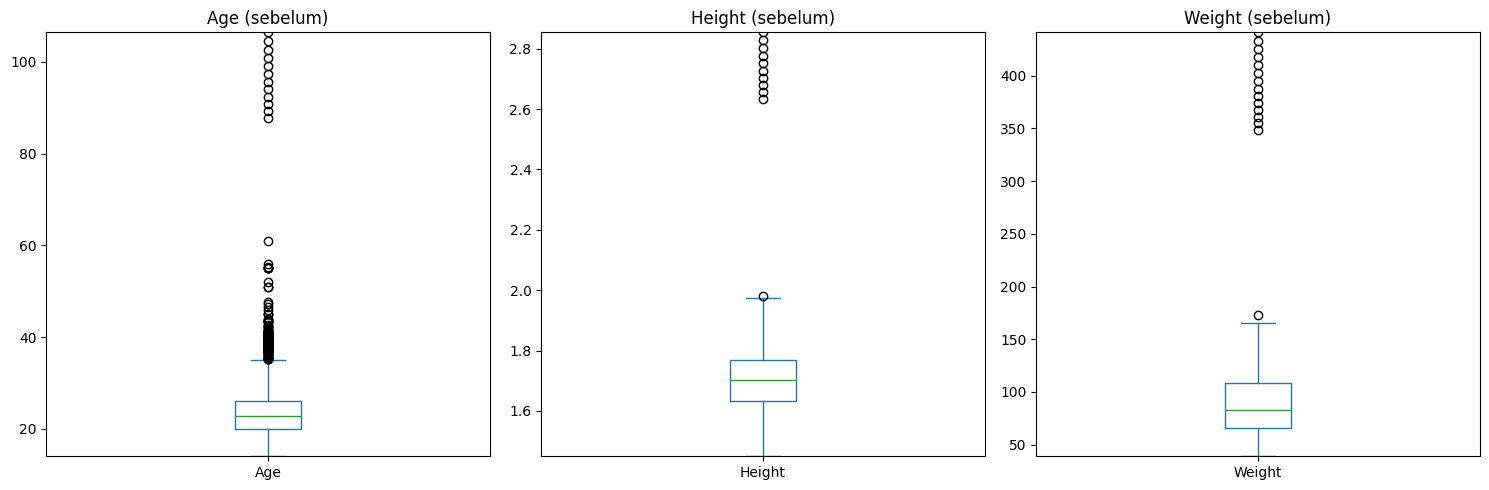

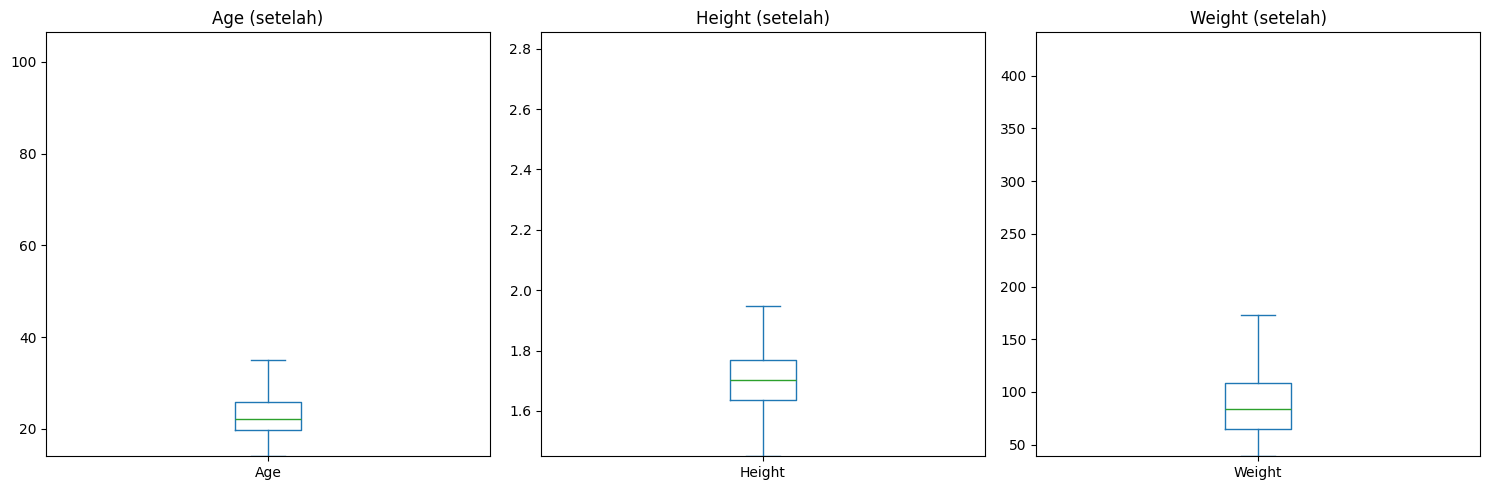

In [18]:
# Pastikan data numerik benar
num_cols = ['Age', 'Height', 'Weight']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Tentukan batas sumbu y agar konsisten
y_limits = {}
for col in num_cols:
    min_val = df[col].min()
    max_val = df[col].max()
    y_limits[col] = (min_val, max_val)

# visualisasi data numerik sebelum menangani outlier
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(num_cols):
    df[[col]].plot(kind='box', ax=axes[i])
    axes[i].set_title(f"{col} (sebelum)")
    axes[i].set_ylim(y_limits[col])
plt.tight_layout()
plt.show()

# Metode IQR untuk menghapus outlier dari kolom numerik
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

# Visualisasi boxplot setelah outlier ditangani
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(num_cols):
    df[[col]].plot(kind='box', ax=axes[i])
    axes[i].set_title(f"{col} (setelah)")
    axes[i].set_ylim(y_limits[col])
plt.tight_layout()
plt.show()

- Mengapa perlu tangani outlier?
  - Agar data lebih bersih, model tidak terganggu, dan visualisasi lebih representatif
- Mengapa hanya 3 kolom (Age, Height, Weight)?
  - Karena hanya 3 kolom tersebut yang benar-benar numerik kontinu dan rawan outlier; kolom lain tidak cocok untuk deteksi outlier menggunakan IQR

In [19]:
# Encoding fitur kategorikal (selain target)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('NObeyesdad')

# Label encoding untuk fitur kategorikal
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encoding untuk target
target_encoder = LabelEncoder()
df['NObeyesdad'] = target_encoder.fit_transform(df['NObeyesdad'])
label_encoders['NObeyesdad'] = target_encoder

# Tampilkan hasil encode awal
print("Data setelah encoding:")
display(df.head())


#kenapa harus di encode? karena agar bisa diproses oleh algoritma machine learning, yang umumnya hanya bisa bekerja dengan data numerik.

Data setelah encoding:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,3,1
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,3,1
2,23.0,1,1.80,77.0,1,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,3,1
3,27.0,1,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,4,5
4,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,3,6


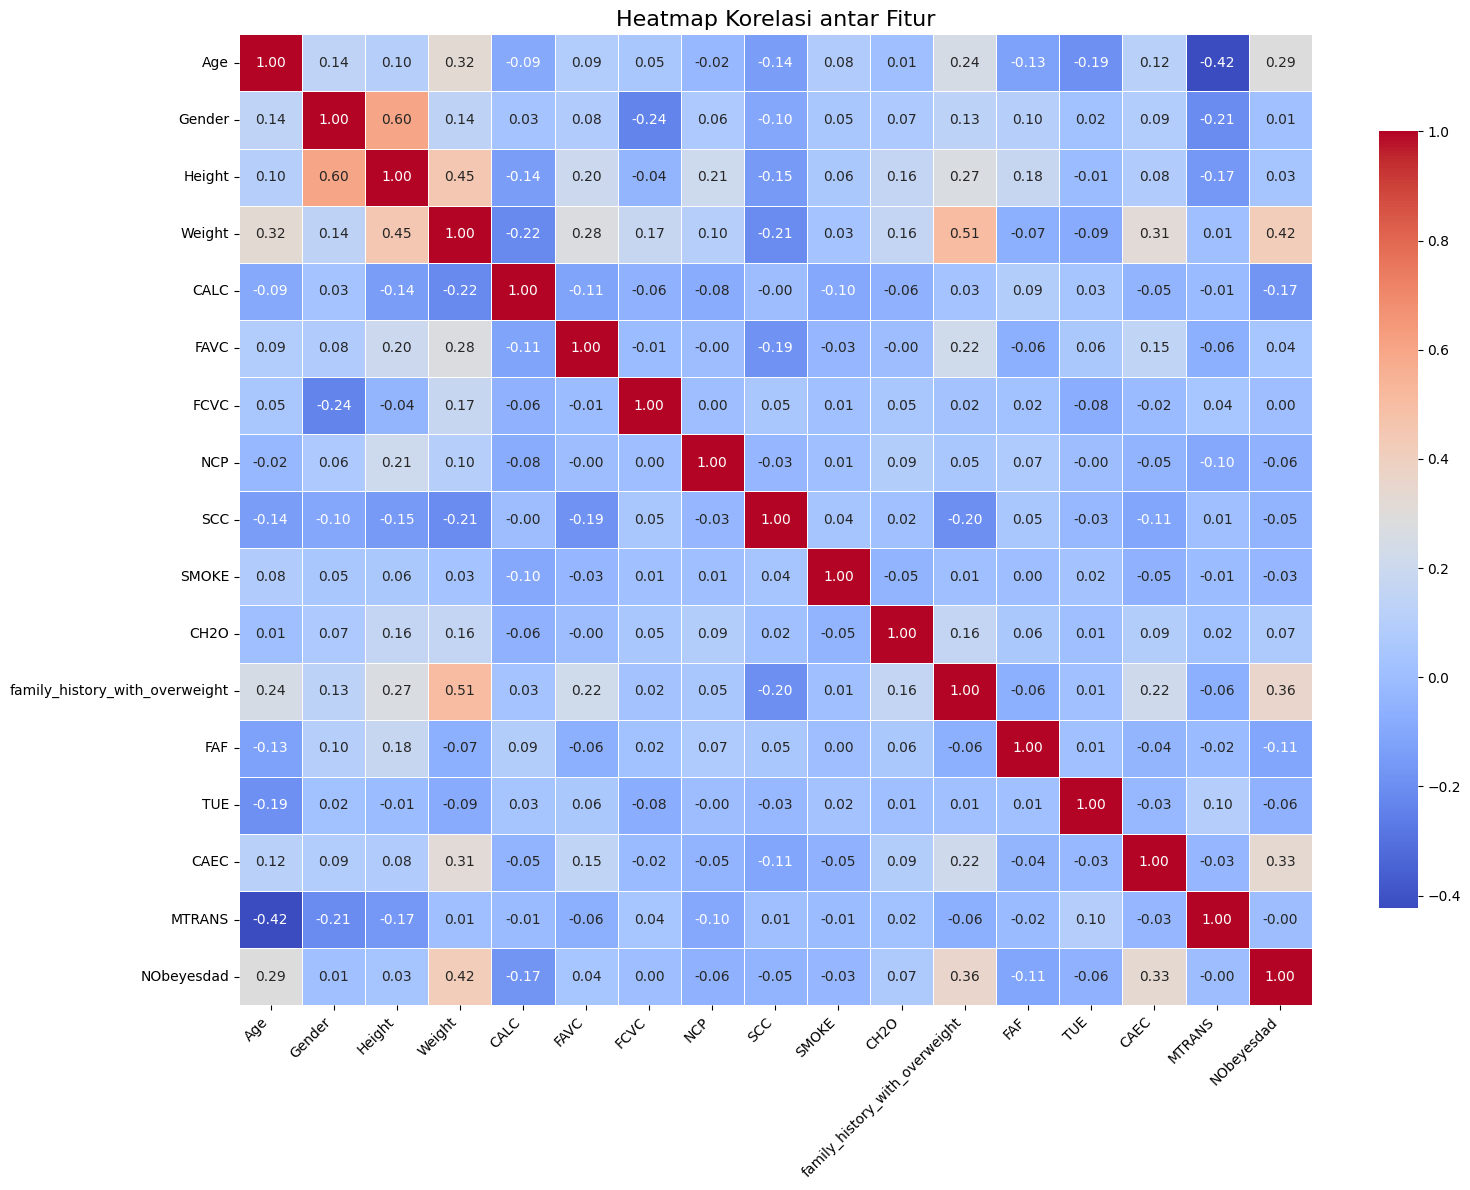

In [20]:
# Heatmap korelasi
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Heatmap Korelasi antar Fitur", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# Warna dan Nilai:

- Warna merah menunjukkan korelasi positif kuat (mendekati +1).

- Warna biru menunjukkan korelasi negatif kuat (mendekati -1).

- Nilai mendekati 0 berarti tidak ada hubungan linear yang signifikan antara dua fitur.

# Korelasi terhadap Target (NObeyesdad):

- Weight memiliki korelasi positif tertinggi (0.42) terhadap target, artinya semakin tinggi berat badan, kemungkinan kelas obesitas meningkat.

- family_history_with_overweight (0.36) juga memiliki korelasi positif cukup kuat, menunjukkan riwayat keluarga berpengaruh terhadap obesitas.

- CAEC (0.33), Age (0.29) dan dan CH2O (0.10) juga punya pengaruh, meskipun lebih lemah.

- MTRANS (-0.00) memiliki korelasi negatif atau sangat lemah terhadap target, artinya hubungannya tidak signifikan.

# Korelasi antar fitur lain:

- Height dan Weight: korelasi cukup tinggi (0.45), karena tinggi badan dan berat badan sering sejalan.

- Weight dan family_history_with_overweight: korelasi cukup tinggi (0.51).

- Fitur-fitur seperti SCC, SMOKE, dan NCP memiliki korelasi rendah terhadap fitur lainnya dan terhadap target.

In [21]:
# Pisahkan fitur dan target
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

memisahkan data menjadi fitur dan target, lalu menstandarisasi fitur agar semua memiliki skala yang seragam. Penting supaya model machine learning dapat belajar secara efektif tanpa bias akibat perbedaan skala fitur.

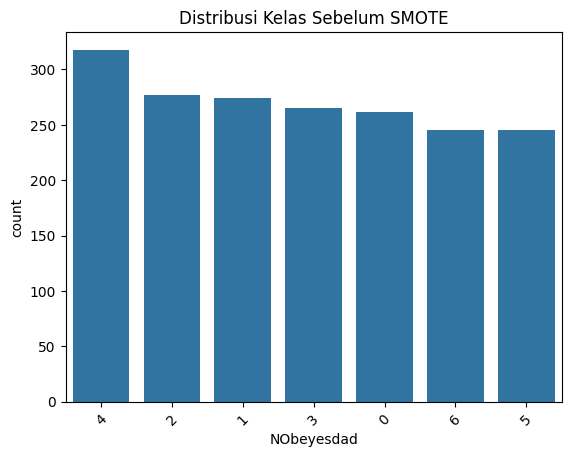

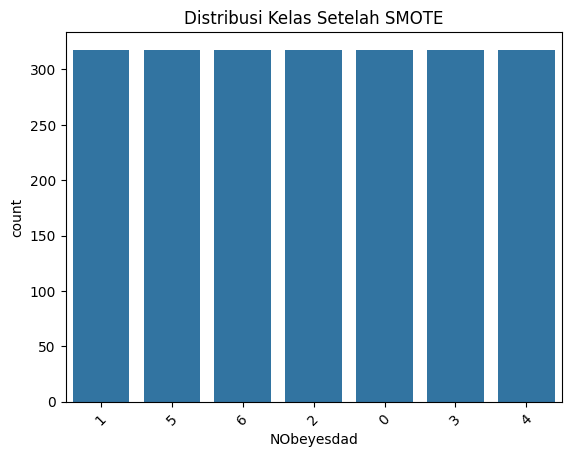

In [22]:
# Visualisasi distribusi kelas sebelum SMOTE
sns.countplot(x=y, order=pd.Series(y).value_counts().index)
plt.title("Distribusi Kelas Sebelum SMOTE")
plt.xticks(rotation=45)
plt.show()

# Tangani ketidakseimbangan kelas dengan SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Distribusi kelas setelah SMOTE
sns.countplot(x=y_resampled, order=pd.Series(y_resampled).value_counts().index)
plt.title("Distribusi Kelas Setelah SMOTE")
plt.xticks(rotation=45)
plt.show()

# SMOTE digunakan agar model machine learning tidak terlalu condong ke kelas mayoritas dan tetap mampu mengenali pola di kelas minoritas dengan baik.
# Berguna juga untuk peningkatan akurasi, recall, F1-score terutama untuk kelas minoritas yang biasanya sulit dikenali.

In [23]:
# Split data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

# dataset dibagi menjadi 80% data latih dan 20% data uji dengan 16 kolom fitur yang ada di dalam dataset

Ukuran data latih: (1780, 16)
Ukuran data uji: (446, 16)


### Kesimpulan Preprocessing Data
- Missing values berhasil diatasi dengan mengganti nilai "?" pada kolom kategorikal dengan modus dan numerik dengan median. Meskipun sedikit tapi masih sangat berguna jika ada informasi peting dikarenakan dataset yang ada masih relatif sedikit.

- untuk data duplikat berhasil dihapus dan menyisah=kan kolom pertama (yang asli).

- Semua fitur kategorikal telah dikonversi ke bentuk numerik menggunakan Label Encoding.

- Seluruh fitur digunakan karena tidak ada korelasi yang sangat rendah terhadap target.

- Data numerik telah dinormalisasi menggunakan StandardScaler agar berada dalam skala yang seragam.

- Distribusi kelas target yang sebelumnya tidak seimbang telah ditangani menggunakan teknik SMOTE.

- Dataset telah dibagi menjadi data latih dan data uji untuk keperluan pemodelan.

# **PELATIHAN MODEL & EVALUASI**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

# Dictionary untuk menyimpan hasil
results = {}

# Loop untuk melatih dan menyimpan hasil tiap model
for name, model in models.items():
    print(f"🔍 Evaluasi Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Simpan hasil ke dictionary
    results[name] = {
        "y_pred": y_pred,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='weighted'),
        "recall": recall_score(y_test, y_pred, average='weighted'),
        "f1": f1_score(y_test, y_pred, average='weighted')
    }

    print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))
    print("="*60)


🔍 Evaluasi Model: Logistic Regression
                     precision    recall  f1-score   support

Insufficient_Weight       0.84      0.97      0.90        70
      Normal_Weight       0.85      0.64      0.73        70
     Obesity_Type_I       0.92      0.84      0.88        64
    Obesity_Type_II       0.90      0.95      0.92        58
   Obesity_Type_III       0.98      0.98      0.98        60
 Overweight_Level_I       0.81      0.84      0.82        64
Overweight_Level_II       0.75      0.82      0.78        60

           accuracy                           0.86       446
          macro avg       0.86      0.86      0.86       446
       weighted avg       0.86      0.86      0.86       446

🔍 Evaluasi Model: Random Forest
                     precision    recall  f1-score   support

Insufficient_Weight       0.97      0.94      0.96        70
      Normal_Weight       0.88      0.94      0.91        70
     Obesity_Type_I       1.00      0.98      0.99        64
    Obesity

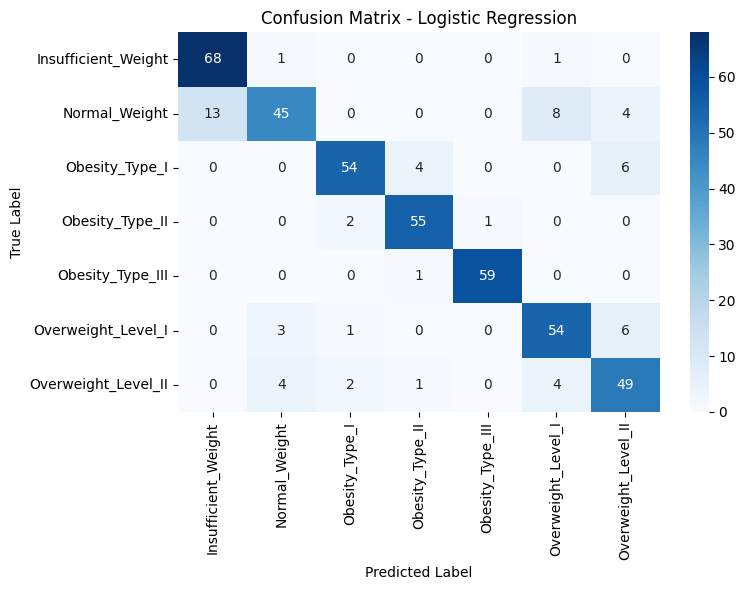

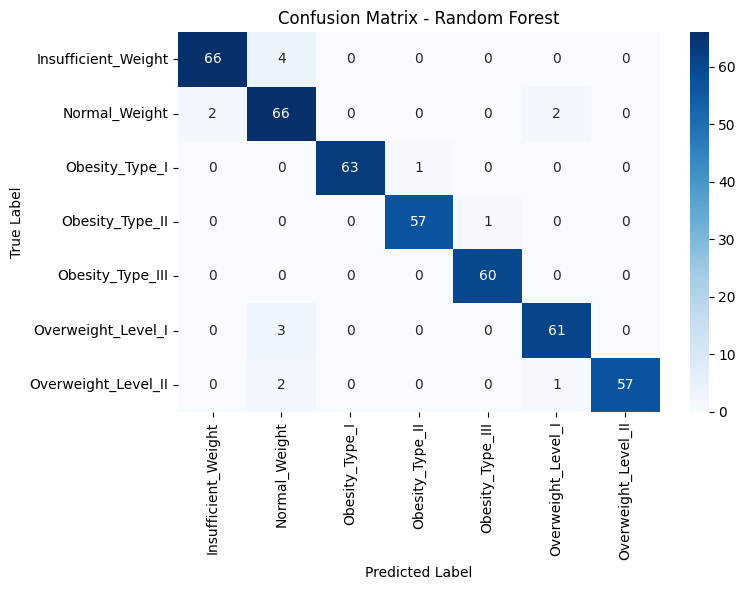

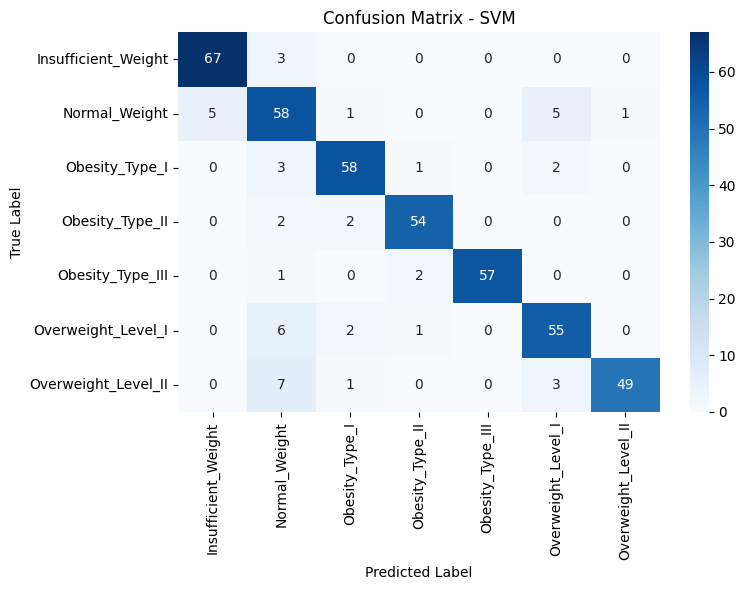

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix untuk semua model
for model_name in results:
    y_pred = results[model_name]["y_pred"]
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_encoder.classes_,
                yticklabels=target_encoder.classes_)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()


In [26]:
print("Model dalam results:", results.keys())

Model dalam results: dict_keys(['Logistic Regression', 'Random Forest', 'SVM'])


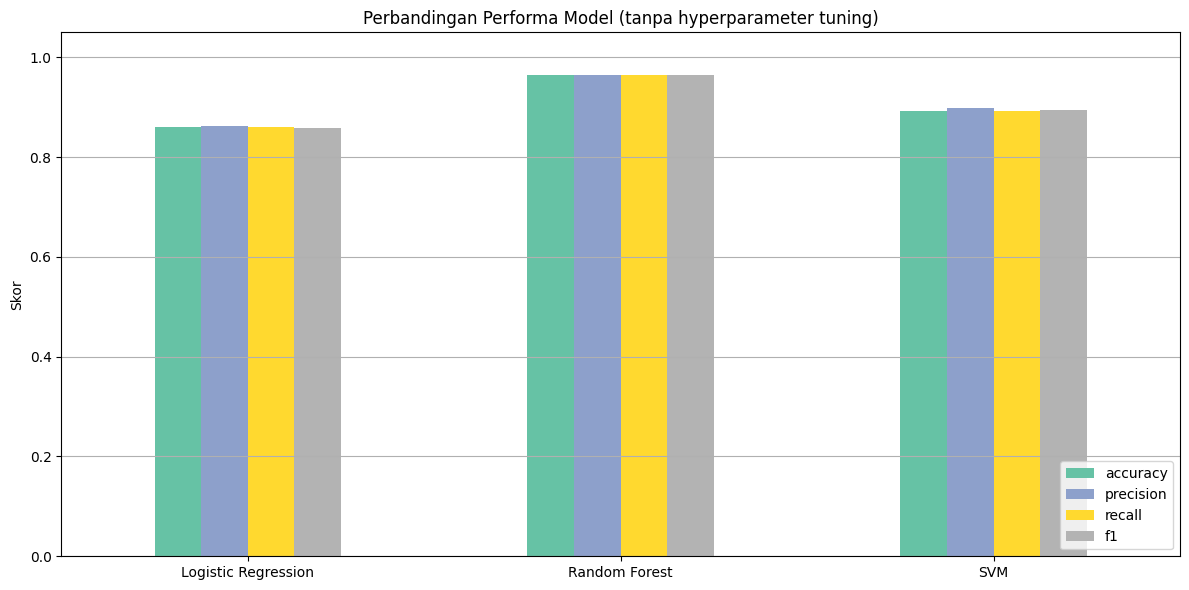

,accuracy,precision,recall,f1
Logistic Regression,0.860987,0.862968,0.860987,0.85847
Random Forest,0.964126,0.965376,0.964126,0.964445
SVM,0.892377,0.898751,0.892377,0.8939


In [27]:
results_df = pd.DataFrame(results).T[['accuracy', 'precision', 'recall', 'f1']]

# Visualisasi
results_df.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title("Perbandingan Performa Model (tanpa hyperparameter tuning)")
plt.ylabel("Skor")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Tampilkan tabel
display(results_df)

### Kesimpulan Pelatihan Model Setelah Pre-Processing dan Sebelum Tunning
- didapatkan setelah melakukan pre-processing dengan benar saat pelatihan model dengan menggunakan algoritma logistic regression, random forest, dan svm. ketiga model memberikan hasil evaluasi cukup bagus dan menandakan model telah berhasil dilatih dengan minim kesalahan untuk dataset obesitas.

- diperoleh hasil tertinggi yaitu random forest dengan hasil rata-rata 97%, yang dimana menandakan bahwa algoritma ini berhasil mengklasifikasikan hampir semuanya benar untuk kelas targetnya.

# **HYPERPARAMETER TUNING dengan GridSearchCV**

In [28]:
# Mencoba kombinasi parameter terbaik untuk tiga model klasifikasi: Logistic Regression, Random Forest, dan SVM
param_grid = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['lbfgs']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

In [29]:
base_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

best_models = {}
tuned_results = {}

for name in base_models:
    print(f"\n🔍 Tuning model: {name}")
    grid = GridSearchCV(base_models[name], param_grid[name], cv=5, scoring='f1_weighted', n_jobs=-1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    best_models[name] = best_model

    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    tuned_results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1,
        "y_pred": y_pred
    }

    print(f"Best Params for {name}: {grid.best_params_}")
    print(classification_report(y_test, y_pred))
    print("="*60)


🔍 Tuning model: Logistic Regression
Best Params for Logistic Regression: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        70
           1       0.92      0.83      0.87        70
           2       0.95      0.94      0.94        64
           3       0.92      0.97      0.94        58
           4       0.97      0.95      0.96        60
           5       0.89      0.92      0.91        64
           6       0.93      0.93      0.93        60

    accuracy                           0.93       446
   macro avg       0.93      0.93      0.93       446
weighted avg       0.93      0.93      0.93       446


🔍 Tuning model: Random Forest
Best Params for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        70
           1       0.88      0.97      0.93     

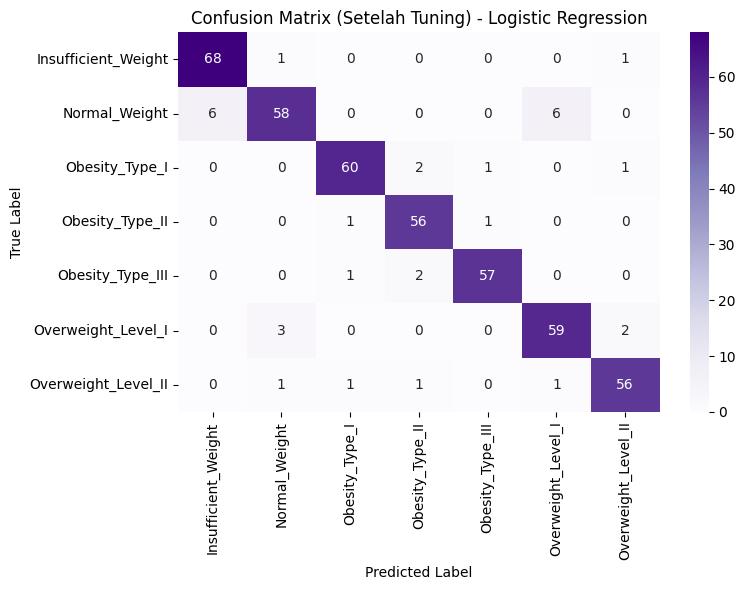

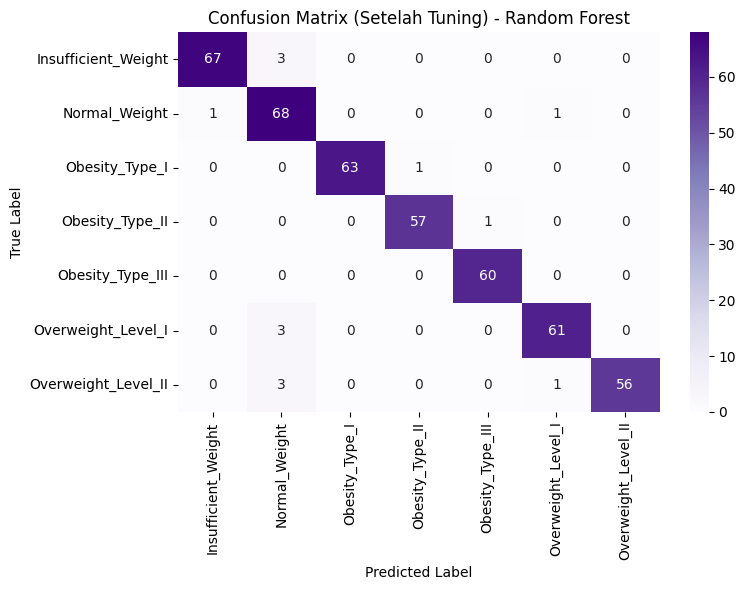

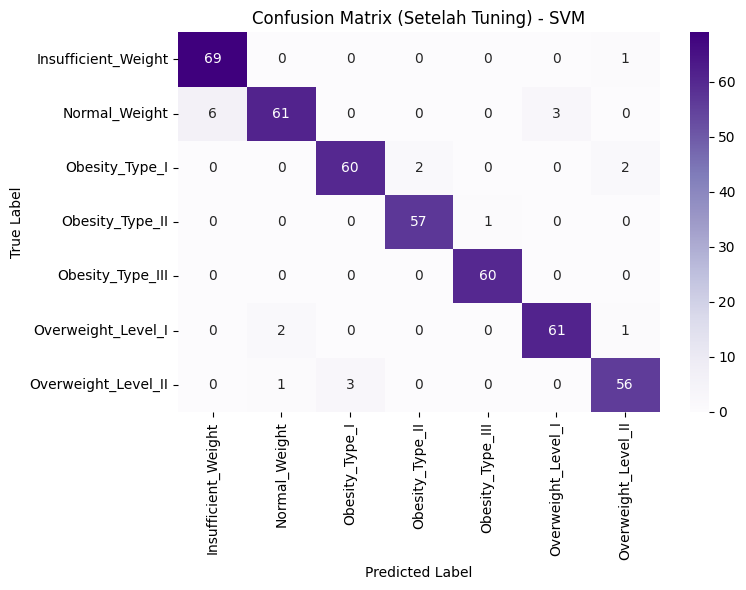

In [30]:
# Menampilkan confusion matrix dari model hasil tuning
for model_name, model in best_models.items():
    y_pred = tuned_results[model_name]["y_pred"]
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
                xticklabels=target_encoder.classes_,
                yticklabels=target_encoder.classes_)
    plt.title(f"Confusion Matrix (Setelah Tuning) - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

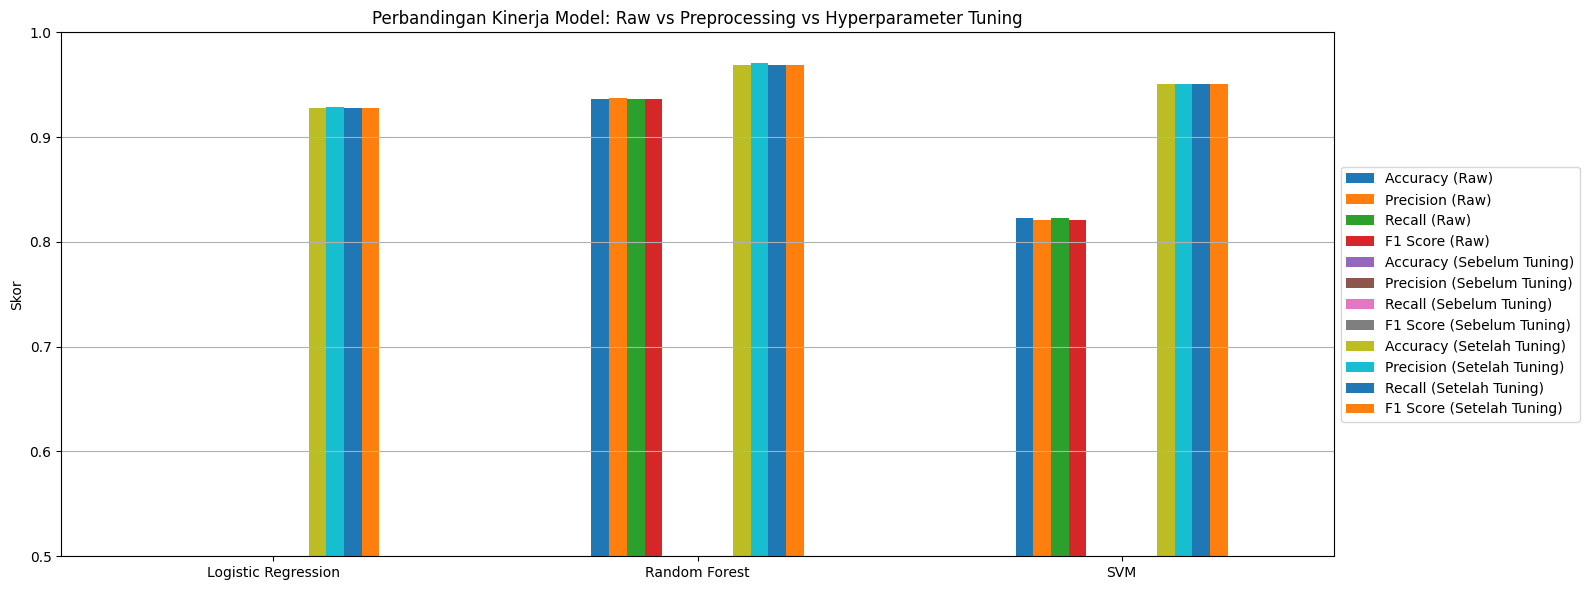

In [31]:
# DataFrame hasil mentah (RAW model - belum preprocessing dan tuning)
raw_results_cleaned = {
    model_name.replace(" (Raw)", ""): {
        "Accuracy": scores["Accuracy"],
        "Precision": scores["Precision"],
        "Recall": scores["Recall"],
        "F1 Score": scores["F1 Score"]
    }
    for model_name, scores in results_raw.items()
}

raw_df = pd.DataFrame(raw_results_cleaned).T
raw_df.columns = [col + " (Raw)" for col in raw_df.columns]

# DataFrame hasil setelah preprocessing (sebelum tuning)
before_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1 Score']).T
before_df.columns = [col + " (Sebelum Tuning)" for col in before_df.columns]

# DataFrame hasil setelah tuning
after_df = pd.DataFrame(tuned_results).T.drop(columns='y_pred')
after_df.columns = [col + " (Setelah Tuning)" for col in after_df.columns]

# Gabungkan semua menjadi satu DataFrame
compare_df = pd.concat([raw_df, before_df, after_df], axis=1)

# Visualisasi
compare_df.plot(kind='bar', figsize=(16, 6))
plt.title("Perbandingan Kinerja Model: Raw vs Preprocessing vs Hyperparameter Tuning")
plt.ylabel("Skor")
plt.xticks(rotation=0)
plt.ylim(0.5, 1.0)
plt.grid(axis='y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

**Kesimpulan Hasil Evaluasi Model Sebelum Pre-Processing, Setelah Pre-Processing (Tidak Tunning) dan Sesudah Melakukan Hyperparameter Tuning**

🔹 Logistic Regression:
- Raw (Tanpa Preprocessing):

- Akurasi sekitar 0.83, dan skor Precision, Recall, serta F1-score juga berada pada kisaran yang cukup tinggi.

- Performa awal cukup baik, meskipun data masih belum bersih dan belum ditangani secara menyeluruh.

Setelah Preprocessing:

- Akurasi membaik menjadi sekitar 0.88, dengan skor F1 dan Recall menunjukkan kestabilan yang lebih baik antar kelas.

- Setelah Tuning (C=100, penalty='l2', solver='lbfgs'):

- Akurasi mencapai hampir 0.93, menunjukkan hasil terbaik dari Logistic Regression.

- Tuning membantu model menjadi lebih general dalam memprediksi berbagai kelas dengan baik.

Kesimpulan:

- Logistic Regression menunjukkan peningkatan performa bertahap dan signifikan dengan preprocessing dan tuning.

- Akurasi meningkat dari 83% ke 93%, membuktikan bahwa model ini sangat sensitif terhadap kualitas input data.

🔹 Random Forest:
- Raw (Tanpa Preprocessing):

- Akurasi sudah tinggi, sekitar 0.93–0.94, menunjukkan kemampuan menangani data meski dalam kondisi mentah.

Setelah Preprocessing:

- Performa naik sedikit ke kisaran 0.95–0.96, mengindikasikan peningkatan efisiensi klasifikasi antar kelas.

- Setelah Tuning (n_estimators=100, max_depth=20, min_samples_split=2):

- Akurasi tetap stabil di angka 0.96, namun terlihat peningkatan kecil dalam skor F1 dan Recall.

Kesimpulan:

- Random Forest sudah sangat baik sejak awal, tetapi preprocessing dan tuning tetap memberikan perbaikan minor dan konsistensi antar kelas.

🔹 SVM (Support Vector Machine):
- Raw (Tanpa Preprocessing):

- Akurasi awal cukup rendah, sekitar 0.83, dengan nilai Recall dan F1 yang juga kurang maksimal.

Setelah Preprocessing:

- Akurasi meningkat ke sekitar 0.93, dan semua metrik evaluasi membaik secara signifikan.

- Setelah Tuning (C=10, kernel='rbf', gamma='scale'):

- SVM menjadi kompetitif dengan akurasi hampir menyamai Random Forest, sekitar 0.94–0.95, serta keseimbangan Precision dan F1 Score yang solid.

Kesimpulan:

- SVM sangat terbantu oleh preprocessing dan tuning.

- Model ini cocok jika dilakukan penanganan data dan pemilihan parameter yang tepat.

🧾 Kesimpulan Umum:
- Preprocessing memiliki dampak signifikan pada Logistic Regression dan SVM, meningkatkan akurasi dan distribusi skor antar kelas.

- Hyperparameter Tuning memberikan perbaikan performa akhir terutama dalam Recall dan F1-score.

- Random Forest menjadi model paling konsisten dan akurat di semua tahap, bahkan saat data masih mentah.

- SVM mengalami peningkatan paling signifikan setelah tuning, menegaskan pentingnya proses penyetelan parameter.

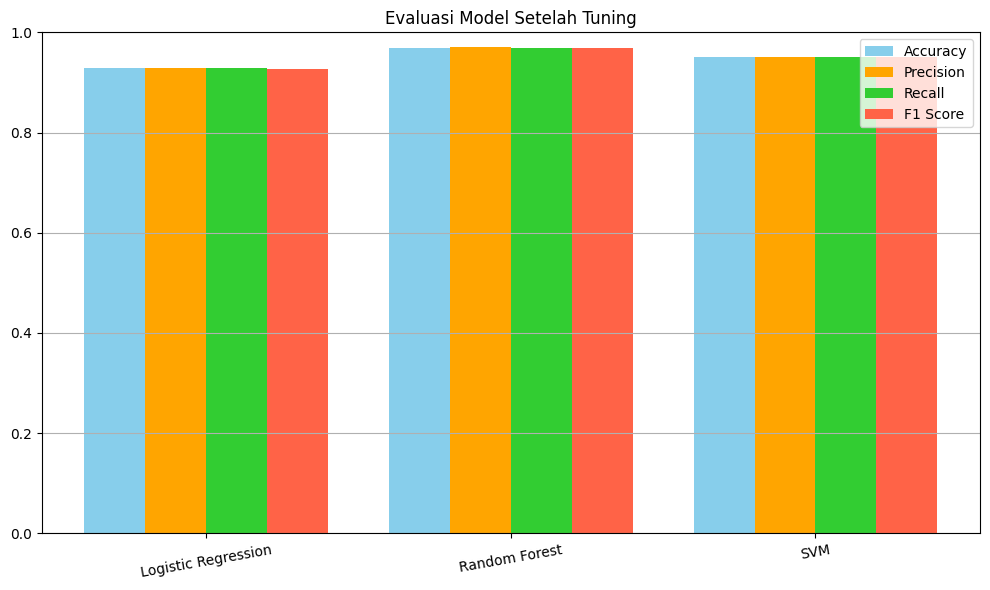


✅ Model Random Forest terbaik beserta scaler dan fitur berhasil disimpan!


In [32]:
# 📊 Visualisasi hasil evaluasi semua model setelah tuning
labels = list(tuned_results.keys())
acc = [tuned_results[m]['Accuracy'] for m in labels]
prec = [tuned_results[m]['Precision'] for m in labels]
rec = [tuned_results[m]['Recall'] for m in labels]
f1s = [tuned_results[m]['F1 Score'] for m in labels]

x = np.arange(len(labels))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - width*1.5, acc, width, label='Accuracy', color='skyblue')
plt.bar(x - width/2, prec, width, label='Precision', color='orange')
plt.bar(x + width/2, rec, width, label='Recall', color='limegreen')
plt.bar(x + width*1.5, f1s, width, label='F1 Score', color='tomato')

plt.xticks(x, labels, rotation=10)
plt.ylim(0, 1)
plt.title("Evaluasi Model Setelah Tuning")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 📌 7. Simpan Model dan Preprocessing (gunakan model terbaik: Random Forest hasil tuning)
import pickle  # Tambahkan ini sebelum menyimpan file

# Simpan model Random Forest terbaik hasil tuning
final_rf_model = best_models['Random Forest']
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(final_rf_model, f)

# Simpan scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Simpan nama kolom hasil one-hot encoding
with open('columns.pkl', 'wb') as f:
    pickle.dump(X.columns.tolist(), f)

print("\n✅ Model Random Forest terbaik beserta scaler dan fitur berhasil disimpan!")
